In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, \
                                BatchNormalization, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras import backend as K

np.random.seed(345)

In [7]:
def get_cnn3_deep(num_classes = 20):
    return Sequential([
        
        UpSampling2D(),

        Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
    
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 

        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 

        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 

        Flatten(),
        
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

model = get_cnn3_deep()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.bui
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [28]:
images_train = np.load('trnImage.npy')
y_train_fine = np.load('trnLabel_fine.npy')
y_train_coarse = np.load('trnLabel_coarse.npy')

images_test = np.load('tstImage.npy')
y_test_fine = np.load('tstLabel_fine.npy')
y_test_coarse = np.load('tstLabel_coarse.npy')

print('TRAIN')
print(f'Images Shape: {images_train.shape}')
print(f'Images Fine Labels Shape: {y_train_fine.shape}')
print(f'Images Coarse Labels Shape: {y_train_coarse.shape} \n')
print('TEST')
print(f'Images Shape: {images_test.shape}')
print(f'Images Fine Labels Shape: {y_test_fine.shape}')
print(f'Images Coarse Labels Shape: {y_test_coarse.shape}')

TRAIN
Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,) 

TEST
Images Shape: (32, 32, 3, 10000)
Images Fine Labels Shape: (10000,)
Images Coarse Labels Shape: (10000,)


TypeError: Invalid shape (32, 3, 50000) for image data

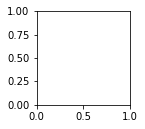

In [67]:
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], interpolation='none')
    plt.title("Class {}".format(y_train_coarse[i]))
    
plt.tight_layout()

In [98]:
#Flatten
image_size = 32
channels = 3
train_images_num = 50000
test_images_num = 10000

X_train = images_train.reshape(train_images_num, image_size, image_size, channels)
X_test = images_test.reshape(test_images_num, image_size, image_size, channels)
input_shape = (image_size, image_size, channels)

#assert(X_train.shape == (50000, 32, 32, 3))
#assert(X_test.shape == (10000, 32, 32, 3))

In [99]:
#Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

if np.max(X_train) > 1: X_train /= 255
if np.max(X_test) > 1: X_test /= 255

num_classes = len(np.unique(y_train_coarse))
fine_num_classes = len(np.unique(y_train_fine))

In [100]:
def get_cnn3():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
    
        Flatten(),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])


model = get_cnn3()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_105 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_106 (Bat (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 15, 15, 64)      

In [101]:
history = model.fit(X_train, y_train_coarse,
                   epochs = 20,
                   verbose = 2,
                   validation_data = (X_test, y_test_coarse))

Epoch 1/20
1563/1563 - 100s - loss: 3.2641 - accuracy: 0.0508 - val_loss: 3.0094 - val_accuracy: 0.0509
Epoch 2/20
1563/1563 - 103s - loss: 3.0307 - accuracy: 0.0499 - val_loss: 3.0060 - val_accuracy: 0.0508
Epoch 3/20


KeyboardInterrupt: 